# Hierarchical & DBSCAN clustering methods

This lab is a brief review of clustering you have seen previously.
These examples are in Python using ScikitLearn instead of R language used in 7020.

**sklearn ref:**

* [K-Means clustering](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
* [DBSCAN clustering](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

## K-Means (Centroid)

In [1]:
from sklearn import datasets
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

np.random.seed(5)



In [2]:
iris = datasets.load_iris()
X_iris = iris.data

# Run Clustering
K = 3   # we are cheating and know this to be the number of "clusters"

k_means = cluster.KMeans(n_clusters=K)
k_means.fit(X_iris) 



KMeans(n_clusters=3)

In [3]:
# Extract the cluster id of each data points 
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# Get the centroids of the clusters
centroids = k_means.cluster_centers_
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


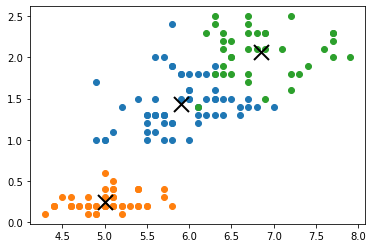

In [5]:
# plot each cluster with its center
from matplotlib import pyplot
import numpy as np

for i in range(K):
    # select only data observations with cluster label == i
    ds = X_iris[np.where(labels==i)]
    # plot the clusters (showing only feature 0 and 3 for making a 2D plot)
    pyplot.plot(ds[:,0],ds[:,3],'o')  
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,3],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

## Choosing the best number of clusters in K-means

As clustering is an unsuprevised learning, there is no right or wrong answer. But it is desirable to choose an optimal number of clusters which will better explain the underlying structure of the dataset.

The Elbow Method is one of the most popular methods to determine this optimal value of k. In this example, we will use **inertia** to create an eblow plot. Inertia is the sum of squared distances of samples to their closest cluster center. 


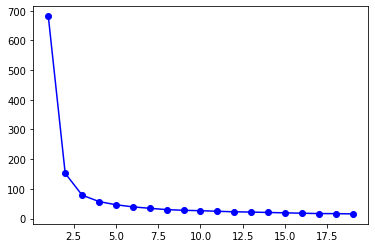

In [6]:
intertia = []

for tot_cluster in range(1, 20):
    kmeans = cluster.KMeans(init="k-means++", n_clusters=tot_cluster, n_init=tot_cluster)
    kmeans.fit(X_iris)
    intertia.append(kmeans.inertia_)

    
plt.plot([i for i in range(1,20)], intertia, 'bo-')

From the elbow plot of interia, we see that inertia values gets smaller with the increase of the number of clusters. But after three clusters the rate of decreasing inertia very small. So we can choose k=3 or k=4.




## Hierarchical Clustering (aka linkage or agglomerative clustering) 

This is an example using the hierarchical clustering algorithm on the iris dataset.

In [7]:
agglo = cluster.AgglomerativeClustering(affinity='euclidean',
                                     linkage='ward',
                                     n_clusters=K)

# Notice we need to transpose the data going into agglomeration. 
# This method expects each row is a feature and each column is an instance
agglo.fit(X_iris) 




AgglomerativeClustering(n_clusters=3)

In [8]:
# Extract the cluster id/label for each data point
labels = agglo.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


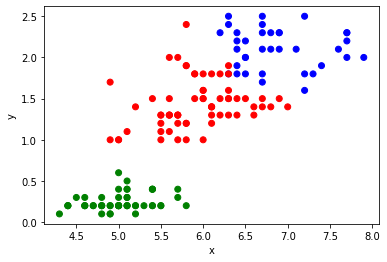

In [9]:
# Define a color label mapping that accommodates up to 7 labels
colors='rgbykcm'

# create the per-datum color mapping
color_map = [colors[i] for i in labels]
                    # for every label (i) use it as an index into the string colors,
                    # which is the list [r,g,b,y,k,c,m]

plt.scatter(X_iris[:,0], X_iris[:,3], c=color_map)  # only feature 0 and 3 are shown in the plot
plt.xlabel("x")
plt.ylabel("y")
plt.show()


You can vary `affinity` (i.e., distance measure), `linkage`, and `n_clusters` to see the effect of these parameters. 

In agglomerative clustering clusters are created with bottom-up approach: 

1. Initially each data point is treated as a cluster
2. In successive iterations points (or group of points) are merged and larger clusters are formed

This formation of clusters can be shown as a dendrogram (i.e tree). To do so, we need to pass `distance_threshold` parameter, which is the distance threshold above which, clusters will not be merged. 


In [10]:
# setting distance_threshold=0 ensures we compute the full tree.
agglo = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agglo = agglo.fit(X_iris)

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

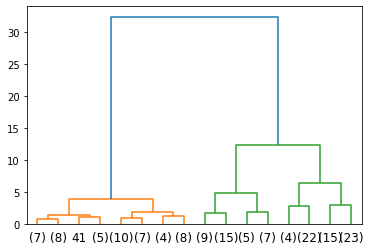

In [12]:
plot_dendrogram(agglo, truncate_mode="level", p=3)

# No more than p levels of the dendrogram tree are displayed. 
# A “level” includes all nodes with p merges from the final merge.

---
## DBSCAN (Density-based)

This is an example using the DBSCAN clustering algorithm on the iris dataset.

In [13]:
# Recall the parameters are density based
p_eps=1   # Radius
p_min_samples=10  # Strength of local neighborhood

dbs = cluster.DBSCAN(eps=p_eps, min_samples=p_min_samples)
dbs.fit(X_iris) 


DBSCAN(eps=1, min_samples=10)

In [14]:
# Extract the label vector
labels = dbs.labels_
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### View and plot the data with region labeling

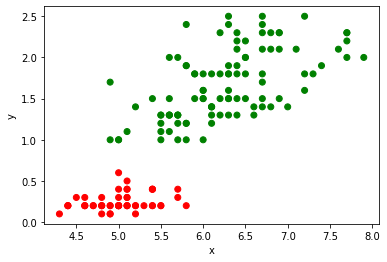

In [15]:
from matplotlib import pyplot
import numpy as np

# Define a color label mapping that accommodates up to 7 labels
colors='rgbykcm'

# create the per-datum color mapping
color_map = [colors[i] for i in labels]
# print(color_map)
                    # for every label (i) use it as an index into the string colors,
                    # which is the list [r,g,b,y,k,c,m]

plt.scatter(X_iris[:,0], X_iris[:,3], c=color_map)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### <span style="background:yellow">What are we seeing from DBSCAN?</span>


 1. How many clusters did you get from DBSCAN and is this what you expected?
 1. Would you suggest we change the parameters to DBSCAN to attempt to get three clusters? Why or why not, and if "yes" ... How would you suggest to change the parameters

#### From the given dbscan we have only got 2 cluster. Its because two of our classes have commong spacial regions. And we are selecting the distance of 1 and minimum number of sample around the center should be 10. 

To get our expected number of cluster. There are multiple ways. We can reduce the distance and keep the number of items in the circle same. But lowering the distance will also increse the number of outliers points; this may not be desirable. E.g., let's use min number of samples equals to 10 and reduce the distance to 0.4. This will provide our expected 3 cluster. But it will also increase the number of outliers. 

In [16]:
# Recall the parameters are density based
p_eps=.4   # New redius
p_min_samples=10  # Strength of local neighborhood

dbs = cluster.DBSCAN(eps=p_eps, min_samples=p_min_samples)
dbs.fit(X_iris) 

# Extract the label vector
labels = dbs.labels_
print(labels)

# total cluster 
discovered_cluster = len(np.unique(labels[labels >= 0])) # outliers are labeled as -1

# total outliers
out = len(dbs.labels_) - len(labels[labels>=0])

print("Total cluster ", discovered_cluster, " outliers ", out)



[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1 -1  1  2 -1 -1  1 -1 -1  2 -1 -1 -1  1  2  2 -1 -1 -1 -1
 -1 -1 -1  1  1  1 -1 -1 -1 -1  2 -1 -1 -1  1 -1  2  2  2 -1  2 -1  2  2
  2 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
Total cluster  3  outliers  83


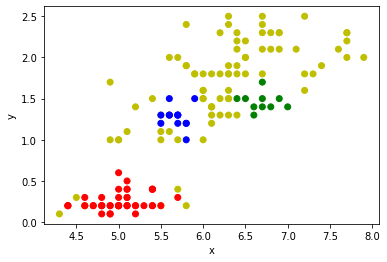

All the yellow points are the outliers


In [17]:
# Define a color label mapping that accommodates up to 7 labels
colors='rgbmkcy'

# create the per-datum color mapping
color_map = [colors[i] for i in labels]
                    # for every label (i) use it as an index into the string colors,
                    # which is the list [r,g,b,y,k,c,m]

plt.scatter(X_iris[:,0], X_iris[:,3], c=color_map)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print('All the yellow points are the outliers')

For the distance of 0.4 and the item count of 10, we found 83 outliers, which is quite a lot. We can say that we need to increase the distance, but it may increases the overlaps between the clusters. We can try reducing the number of items around the center. 

Total cluster  4  outliers  22


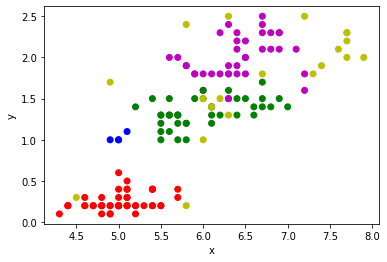

All the yellow points are the outliers
And below is the original class distribution with feature 0 and 3


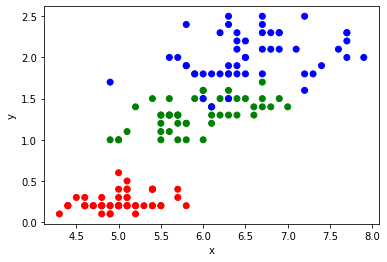

In [18]:

# Recall the parameters are density based
p_eps=.4   # New redius
p_min_samples=3  # Strength of local neighborhood

dbs = cluster.DBSCAN(eps=p_eps, min_samples=p_min_samples)
dbs.fit(X_iris) 

# Extract the label vector
labels = dbs.labels_

# total cluster 
discovered_cluster = len(np.unique(labels[labels >= 0]))

# total outliers
out = len(dbs.labels_) - len(labels[labels>=0])

print("Total cluster ", discovered_cluster, " outliers ", out)

# Define a color label mapping that accommodates up to 7 labels
colors='rgbmkcy'

# create the per-datum color mapping
color_map = [colors[i] for i in labels]
                    # for every label (i) use it as an index into the string colors,
                    # which is the list [r,g,b,y,k,c,m]

plt.scatter(X_iris[:,0], X_iris[:,3], c=color_map)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
print('All the yellow points are the outliers')
print('And below is the original class distribution with feature 0 and 3')

labels = iris.target
color_map = [colors[i] for i in labels]

plt.scatter(X_iris[:,0], X_iris[:,3], c=color_map)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can now see that the number of clusters is increased by one, but the number of outliers is decreased. 


### Evaluating clustering


#### Silhouette score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

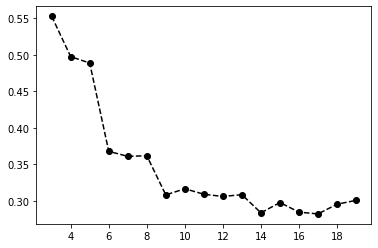

In [19]:
from sklearn.metrics import silhouette_score

scores = []

for tot_cluster in range(3, 20):
    kmeans = cluster.KMeans(init="k-means++", n_clusters=tot_cluster, n_init=tot_cluster)
    kmeans.fit(X_iris)
    predicted_labels = kmeans.labels_
    scores.append(silhouette_score(X_iris, predicted_labels, metric = 'euclidean'))
    
    
plt.plot([i for i in range(3, 20)], scores, 'ko--')


#### Dunn index

The Davies–Bouldin index (DBI) (introduced by David L. Davies and Donald W. Bouldin in 1979), a metric for evaluating clustering algorithms, is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. The lower the DB index denotes better clustering. 


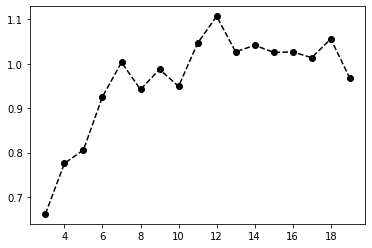

In [20]:
from sklearn.metrics import davies_bouldin_score

scores = []
for tot_cluster in range(3,20):
    kmeans = cluster.KMeans(init="k-means++", n_clusters=tot_cluster, n_init=tot_cluster)
    kmeans.fit(X_iris)
    predicted_labels = kmeans.labels_
    scores.append(davies_bouldin_score(X_iris, predicted_labels))
    
plt.plot([i for i in range(3,20)], scores, 'ko--')

For both measures, we get the best performance when k=3.